In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import pylab
import seaborn as sns
import pandas as pd

In [15]:
movingSquares = pd.read_csv(
    "artificial/squares/movingSquares.data", names=["x", "y"], sep=" ", header=None)
movingSquares_class = pd.read_csv(
    "artificial/squares/movingSquares.labels", names=["class"], header=None)
movingSquares["class"] = movingSquares_class["class"].astype(str)
movingSquares.to_csv("artificial/squares/movingSquares.csv", index=False)


In [2]:
movingSquares = pd.read_csv("artificial/squares/squares.csv", dtype={"labels": int})

In [25]:
movingSquares[(movingSquares.index < 100) & (movingSquares.index > 0) & (movingSquares.labels == 1)]

,x,y,labels
1,0.167903,0.020489,1
5,0.184678,0.047609,1
9,0.174274,0.022162,1
13,0.184515,0.017906,1
17,0.157026,0.033003,1
21,0.191156,0.026991,1
25,0.180898,0.015213,1
29,0.161008,0.032908,1
33,0.163715,0.027844,1
37,0.208740,0.021765,1


<Figure size 640x480 with 0 Axes>

In [16]:
movingSquares.x.min(), movingSquares.x.max(), movingSquares.y.min(), movingSquares.y.max(), movingSquares["class"].unique()

(0.0004683,
 0.9981902,
 2e-07,
 0.0499996,
 array(['0', '1', '2', '3'], dtype=object))

In [39]:
plt.cm.plasma(np.linspace(0, 1, 10))[1]

array([0.274191, 0.012109, 0.622722, 1.      ])

In [35]:
matplotlib.colors.Colormap("tab", 10)

/home/ewerton/Documentos/Aprendizado de Máquina/drift/am_concept_drift/am_concept_drift/venv/lib/python3.10/site-packages/seaborn/relational.py:573: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  points = ax.scatter(x=x, y=y, **kws)
/home/ewerton/Documentos/Aprendizado de Máquina/drift/am_concept_drift/am_concept_drift/venv/lib/python3.10/site-packages/seaborn/relational.py:573: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  p

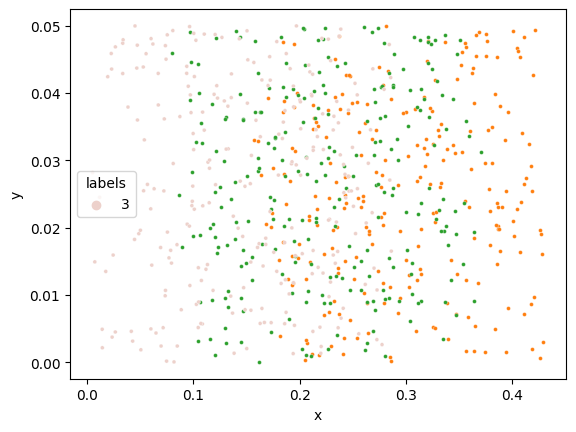

In [5]:
movingSquares.labels.max()+1

4

/home/ewerton/Documentos/Aprendizado de Máquina/drift/am_concept_drift/am_concept_drift/venv/lib/python3.10/site-packages/seaborn/relational.py:573: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  points = ax.scatter(x=x, y=y, **kws)
/home/ewerton/Documentos/Aprendizado de Máquina/drift/am_concept_drift/am_concept_drift/venv/lib/python3.10/site-packages/seaborn/relational.py:573: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  p

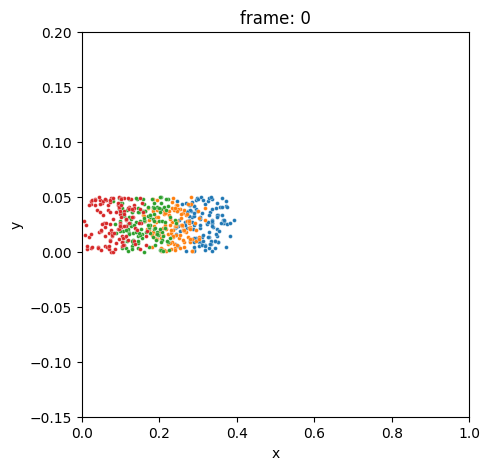

In [3]:
points = 500
expected_time = 10000
df_len = len(movingSquares)
_frames = 1000
_interval = int(expected_time/_frames)
step = int((df_len-points)/_frames)

fig, ax = plt.subplots()
fig.set()
fig.set_figheight(5)
fig.set_figwidth(5)

def animate(i):
    plt.clf()
    plt.title("frame: "+str(i))
    for j in range(movingSquares.labels.max()+1):
        ax = sns.scatterplot(movingSquares
                            [(movingSquares.index > i*step) & 
                            ( movingSquares.index < i*step+points) & 
                            ( movingSquares.labels == j)], 
            x="x", 
            y="y", 
            c=plt.cm.tab10(np.linspace(0, 1, 10))[j], 
            s=8.0)
    ax.set(xlim=(0,1), ylim=(-0.15,0.2))
    ax.legend([], [], frameon=False)

ani = animation.FuncAnimation(
    fig, animate, frames=_frames, interval=_interval, repeat=True)

writer = animation.PillowWriter(fps=5)
ani.save('images/movingSquares.gif', writer=writer)